# 1. Import dataset

In [2]:
import os
os.getcwd()

'C:\\Users\\hei79524\\Documents\\Coding Learning\\datasets'

In [3]:
# conventional way to import pandas
import pandas as pd

In [4]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('badminton_data_model_predictive_inputs.csv', index_col=0)

# fill the null values in Differences to 0
data = data.fillna(value = 0)

# display the first 5 rows
data.head()

,RankDifference,HeadToHeadDifference,DifferenceDurationToDateVsOpponent,DifferenceDurationInLastYear,DifferenceDurationOnCourtThisTournament,DifferenceMatchesInLastYear,DifferenceTournamentsInLastYear,MatchResult
MatchAthleteID,,,,,,,,
128_P1,13,0,-3566.0,-1517.0,0.0,-33.0,-16.0,Lost
142_P1,11,0,-4695.0,-36.0,12.0,-4.0,5.0,Lost
168_P1,11,0,-7899.0,189.0,-3.0,3.0,1.0,Lost
183_P1,110,0,-6164.0,-1111.0,0.0,-20.0,-11.0,Lost
192_P1,588,0,-731.0,-312.0,0.0,-7.0,-6.0,Lost


In [5]:
# check the shape of the DataFrame (rows, columns)
data.shape

(22186, 8)

# 2. Analyse data

In [6]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

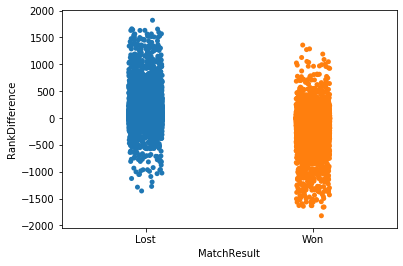

In [7]:
sns.stripplot(x="MatchResult", y="RankDifference", data=data)

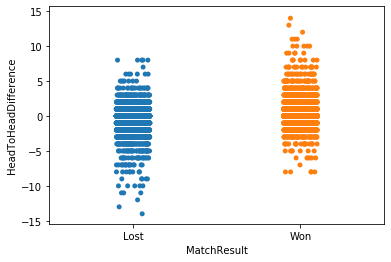

In [8]:
sns.stripplot(x="MatchResult", y="HeadToHeadDifference", data=data)

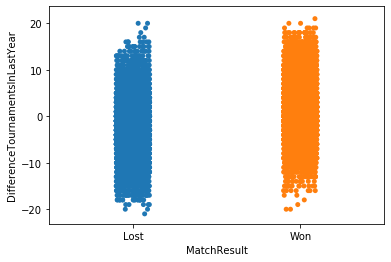

In [9]:
sns.stripplot(x="MatchResult", y="DifferenceTournamentsInLastYear", data=data)

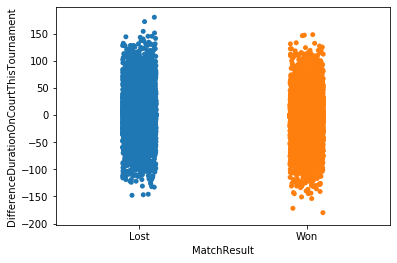

In [10]:
sns.stripplot(x="MatchResult", y="DifferenceDurationOnCourtThisTournament", data=data)

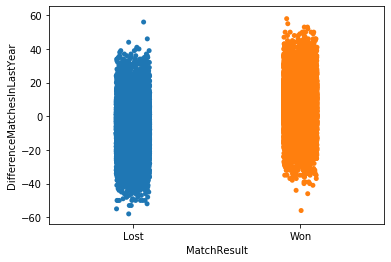

In [11]:
sns.stripplot(x="MatchResult", y="DifferenceMatchesInLastYear", data=data)

# 3. Result predictions

In [12]:
# create a Python list of feature names
feature_cols = ['RankDifference', 'HeadToHeadDifference', 'DifferenceTournamentsInLastYear','DifferenceDurationOnCourtThisTournament']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# print the first 5 rows
X.head()

,RankDifference,HeadToHeadDifference,DifferenceTournamentsInLastYear,DifferenceDurationOnCourtThisTournament
MatchAthleteID,,,,
128_P1,13,0,-16.0,0.0
142_P1,11,0,5.0,12.0
168_P1,11,0,1.0,-3.0
183_P1,110,0,-11.0,0.0
192_P1,588,0,-6.0,0.0


In [13]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(22186, 4)


In [14]:
# select a Series from the DataFrame
y = data.MatchResult

# print the first 5 values
y.head()

MatchAthleteID
128_P1    Lost
142_P1    Lost
168_P1    Lost
183_P1    Lost
192_P1    Lost
Name: MatchResult, dtype: object

## 3-1. Logistic regression

### Simple testing model

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16639, 4)
(16639,)
(5547, 4)
(5547,)


In [17]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg_1 = LogisticRegression(solver='lbfgs')

# fit the model with data
logreg_1.fit(X_train, y_train)

# predict the response for new observations
y_pred = logreg_1.predict(X_test)
print(y_pred)

['Lost' 'Won' 'Lost' ... 'Lost' 'Won' 'Won']


In [18]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.6563908418965206


### Cross-fold validation

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
# 10-fold cross-validation
logreg = LogisticRegression(solver='lbfgs')
scores_logreg = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores_logreg)

[0.68828829 0.68603604 0.66306306 0.68034265 0.70108206 0.76825969
 0.61316501 0.63300271 0.51532913 0.68440036]


In [21]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores_logreg.mean())

0.6632968992436983


### Parameter tuning

#### Dropping single parameters

In [22]:
# Drop RankDifference
X_2 = data[['HeadToHeadDifference','DifferenceDurationOnCourtThisTournament','DifferenceTournamentsInLastYear']]
scores_simple = cross_val_score(logreg, X_2, y, cv=10, scoring='accuracy')
print(scores_simple.mean())

0.6306209229969374


In [23]:
# Drop HeadToHeadDifference
X_2 = data[['RankDifference','DifferenceDurationOnCourtThisTournament','DifferenceTournamentsInLastYear']]
scores_simple = cross_val_score(logreg, X_2, y, cv=10, scoring='accuracy')
print(scores_simple.mean())

0.6380031519346218


In [24]:
# Drop DifferenceDurationOnCourtThisTournament
X_2 = data[['RankDifference','HeadToHeadDifference','DifferenceTournamentsInLastYear']]
scores_simple = cross_val_score(logreg, X_2, y, cv=10, scoring='accuracy')
print(scores_simple.mean())

0.6640627056271782


In [25]:
# Drop DifferenceTournamentsInLastYear
X_2 = data[['RankDifference','HeadToHeadDifference','DifferenceDurationOnCourtThisTournament']]
scores_simple = cross_val_score(logreg, X_2, y, cv=10, scoring='accuracy')
print(scores_simple.mean())

0.6808778706569509


#### Other combinations

In [26]:
# Only consider RankDiff & HeadToHead
X_2 = data[['RankDifference','HeadToHeadDifference']]
scores_simple = cross_val_score(logreg, X_2, y, cv=10, scoring='accuracy')
print(scores_simple.mean())

0.6831316257646285


In [27]:
# Only consider RankDiff & DifferenceDurationOnCourtThisTournament
X_2 = data[['RankDifference','DifferenceDurationOnCourtThisTournament']]
scores_simple = cross_val_score(logreg, X_2, y, cv=10, scoring='accuracy')
print(scores_simple.mean())

0.6848454902151927


In [28]:
# Only consider RankDiff & DifferenceTournamentsInLastYear
X_2 = data[['RankDifference','DifferenceTournamentsInLastYear']]
scores_simple = cross_val_score(logreg, X_2, y, cv=10, scoring='accuracy')
print(scores_simple.mean())

0.6362894905726286


In [29]:
# Drop DifferenceTournamentsInLastYear & RankDiff
X_2 = data[['HeadToHeadDifference','DifferenceDurationOnCourtThisTournament']]
scores_simple = cross_val_score(logreg, X_2, y, cv=10, scoring='accuracy')
print(scores_simple.mean())

0.5429657024021316


## 3-2. K-Nearest neighbour

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores_knn = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores_knn)

[0.66441441 0.6472973  0.63288288 0.64517583 0.67132552 0.70198377
 0.61136159 0.58476105 0.58070334 0.60640216]


In [32]:
print(scores_knn.mean())

0.6346307849779447


In [33]:
# search for an optimal value of K for KNN
k_range = list(range(1, 201,20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5913608558964737, 0.6768664652028042, 0.6845748543854946, 0.688046409800242, 0.6903454130415356, 0.6911565894117743, 0.6909760842898804, 0.6911115443667293, 0.6911563050877748, 0.6908859941997905]


Text(0, 0.5, 'Cross-Validated Accuracy')

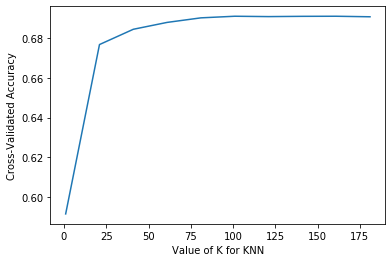

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [174]:
# search for an optimal value of K for KNN
k_range = list(range(1, 1001,50))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5913608558964737, 0.6864679648088124, 0.6911565894117743, 0.6912468825904354, 0.6910210480994972, 0.6901647860664993, 0.6898494301334698, 0.6908860754352187, 0.6924638705432213, 0.6918777975450654, 0.6920131763864857, 0.6916525317021259, 0.6916976579825993, 0.6918780006336364, 0.6918329149708772, 0.6917426624099303, 0.692013257621914, 0.6921934784198084, 0.6916073241862242, 0.6912466388841502]


Text(0, 0.5, 'Cross-Validated Accuracy')

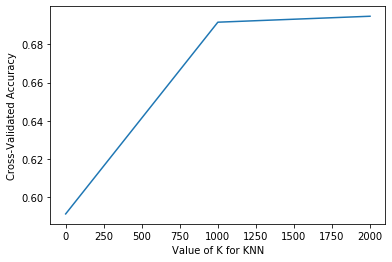

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [166]:
print(k_range)

[1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951]


In [167]:
print("Max predictive accuracy: " + str(max(k_scores)))
print("K-value: " + str(k_scores.index(max(k_scores))*50+1))

Max predictive accuracy: 0.6924638705432213
K-value: 401


### Parameter tuning

In [153]:
knn_2 = KNeighborsClassifier(n_neighbors=126)

In [160]:
# Drop RankDifference
X_2 = data[['HeadToHeadDifference','DifferenceDurationOnCourtThisTournament','DifferenceTournamentsInLastYear']]
scores_simple = cross_val_score(knn_2, X_2, y, cv=10, scoring='accuracy')
print(scores_simple.mean())

0.6001400904962673


In [161]:
# Drop HeadToHeadDifference
X_2 = data[['RankDifference','DifferenceDurationOnCourtThisTournament','DifferenceTournamentsInLastYear']]
scores_simple = cross_val_score(knn_2, X_2, y, cv=10, scoring='accuracy')
print(scores_simple.mean())

0.6923739429239881


In [162]:
# Drop DifferenceDurationOnCourtThisTournament
X_2 = data[['RankDifference','HeadToHeadDifference','DifferenceTournamentsInLastYear']]
scores_simple = cross_val_score(knn_2, X_2, y, cv=10, scoring='accuracy')
print(scores_simple.mean())

0.6947631581085142


In [163]:
# Drop DifferenceTournamentsInLastYear
X_2 = data[['RankDifference','HeadToHeadDifference','DifferenceDurationOnCourtThisTournament']]
scores_simple = cross_val_score(knn_2, X_2, y, cv=10, scoring='accuracy')
print(scores_simple.mean())

0.6879112340473927
